In [1]:
import pandas as pd
import ast
import json
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
sns.set(rc={'figure.figsize':(12,8)})
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df_b = pd.read_json('yelp_dataset_2022/business.json', lines=True)

In [3]:
df_b["state"].value_counts()
us_states = ["AL", "KY", "OH", "AK", "LA", "OK", "AZ", "ME", "OR", "AR", "MD", "PA", "AS",
             "MA", "PR", "CA", "MI", "RI", "CO", "MN", "SC", "CT", "MS", "SD", "DE", "MO",
             "TN", "DC", "MT", "TX", "FL", "NE", "TT", "GA", "NV", "UT", "GU", "NH", "VT",
             "HI", "NJ", "VA","ID", "NM", "VI", "IL", "NY", "WA", "IN", "NC", "WV", "IA", 
             "ND", "WI", "KS", "MP", "WY"]
df_b = df_b[df_b['state'].isin(us_states)]

In [4]:
df_closed = df_b[df_b['is_open']==0] 
closed_fastfood = df_closed[df_closed.categories.str.contains('Fast Food',case=True,na=False)]
closed_fastfood 

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
474,Dl1alpHSJE4_iB0MGKRLXw,Johnny Rockets,5555 St. Louis Mills Blvd,Hazelwood,MO,63042,38.786090,-90.415775,2.0,6,0,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Food, Fast Food, Sandwiches, Restaurants, Amer...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
496,RsTF2skxLcp6qo9FdnA5PA,Pizza Hut,"16 Summit Sq, Store 2B, Route 413 & Doublewood...",Langhorne,PA,19047,40.217860,-74.926634,1.5,18,0,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Italian, Restaurants, Fast Food, Chicken Wings...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:..."
768,_-SSObHzljeA11HAF0lIrQ,Hardee's,4116 W Hillsborough Ave,Tampa,FL,33614,27.995521,-82.512474,2.5,27,0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Restaurants, Fast Food, Burgers","{'Monday': '5:0-21:0', 'Tuesday': '5:0-21:0', ..."
784,ZfWVso8VlT0VN14rxVHccQ,Candida's Pizza,35 E Butler Ave,Ambler,PA,19002,40.154294,-75.222913,2.5,22,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Restaurants, Pizza, Fast Food","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
921,vLT1KtrA9bWvjFOg-0xVIg,Pieology Pizzeria,"7000 Hollister Ave, Ste F",Goleta,CA,93117,34.430453,-119.872345,3.5,131,0,"{'RestaurantsAttire': ''casual'', 'Alcohol': '...","Restaurants, Gluten-Free, Pizza, Vegan, Fast Food","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149897,DkdMQyXlJbkqhq3XCnoLlQ,Taco John's,5068 Murfreesboro Rd,La Vergne,TN,37086,36.021876,-86.583757,2.5,29,0,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Restaurants, Fast Food, Mexican","{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ..."
150111,qjtELTt9fdIwoi_xGNN21g,Chipotle Mexican Grill,400 W Route 38,Moorestown,NJ,08057,39.943481,-74.964743,3.0,63,0,"{'RestaurantsDelivery': 'False', 'Caters': 'Tr...","Restaurants, Mexican, Fast Food","{'Monday': '10:45-22:0', 'Tuesday': '10:45-22:..."
150154,mQsXDZ2EGBJ5wj2VI4zr_Q,Erbert & Gerbert's Sandwich Shop,102 E Carmel Dr,Carmel,IN,46032,39.961425,-86.125405,3.5,29,0,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Soup, Sandwiches, Restaurants, Fast Food","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."
150226,oNeZmmoO7OCyT2vSsVnGKw,Coney Island Sandwich Shop,250 Dr Martin Luther King Jr St N,St Petersburg,FL,33705,27.774380,-82.646986,4.0,109,0,"{'RestaurantsPriceRange2': '1', 'RestaurantsDe...","Restaurants, Fast Food, Sandwiches, Hot Dogs","{'Monday': '10:0-16:0', 'Tuesday': '10:0-16:0'..."


In [5]:
df_open = df_b[df_b['is_open']==1]
df_open = df_open[df_b['stars']<=2] 
open_fastfood = df_open[df_open.categories.str.contains('Fast Food',case=True,na=False)]
open_fastfood

/var/folders/zh/j34n7hk15kb02m2n0kr685j40000gn/T/ipykernel_5368/2336299240.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_open = df_open[df_b['stars']<=2]


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
161,G4lRmwDHdvhZAhmtlsYYBw,Wendy's,741 Thompson Ln,Nashville,TN,37204,36.112076,-86.767446,1.5,37,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Burgers, Restaurants, Fast Food","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
193,yM8LlTInbQH4FwWC97lz6w,McDonald's,1919 S Jefferson,St. Louis,MO,63104,38.612495,-90.221942,1.5,100,1,"{'Alcohol': 'u'none'', 'BikeParking': 'True', ...","Fast Food, Restaurants, Food, Burgers, Coffee ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
199,O1oZpbZNDMH_gz8DhsZCdA,Wendy's,700 E. Hunting Park,Philadelphia,PA,19124,40.012141,-75.115015,1.5,15,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Burgers, Restaurants, Fast Food","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149770,ewZeX023iPD2grGY3aL4zw,Arby's,Pilot Travel Ctr,Troy,IL,62294,38.731747,-89.909024,2.0,5,1,"{'RestaurantsReservations': 'False', 'GoodForK...","Burgers, Delis, Fast Food, Sandwiches, Restaur...",None
149835,N9L1B3TD57wyDl7f3Awlcg,KFC,609 Naamans Rd,Claymont,DE,19703,39.817152,-75.457245,1.0,31,1,"{'RestaurantsTakeOut': 'True', 'WiFi': ''no'',...","Chicken Shop, Chicken Wings, Fast Food, Restau...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:..."
149963,iNKg6firpzD5u5O1Gqd0HA,Taco Bell,12420 St Charles Rock Rd,Bridgeton,MO,63044,38.754822,-90.430455,1.5,20,1,"{'BikeParking': 'True', 'RestaurantsGoodForGro...","Fast Food, Breakfast & Brunch, Restaurants, Ta...","{'Monday': '8:0-2:0', 'Tuesday': '8:0-2:0', 'W..."
149976,8Tg3imlkSI8ugCDM4bpSeg,Chick-fil-A,2000 Belmont Blvd,Nashville,TN,37212,36.132446,-86.795202,1.5,6,1,"{'RestaurantsReservations': 'False', 'Caters':...","Caterers, Chicken Shop, Event Planning & Servi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-20:0', ..."


In [6]:
fastfood_list = [closed_fastfood, open_fastfood]
fastfood_df = pd.concat(fastfood_list)
fastfood_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
474,Dl1alpHSJE4_iB0MGKRLXw,Johnny Rockets,5555 St. Louis Mills Blvd,Hazelwood,MO,63042,38.786090,-90.415775,2.0,6,0,"{'RestaurantsPriceRange2': '1', 'OutdoorSeatin...","Food, Fast Food, Sandwiches, Restaurants, Amer...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
496,RsTF2skxLcp6qo9FdnA5PA,Pizza Hut,"16 Summit Sq, Store 2B, Route 413 & Doublewood...",Langhorne,PA,19047,40.217860,-74.926634,1.5,18,0,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Italian, Restaurants, Fast Food, Chicken Wings...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:..."
768,_-SSObHzljeA11HAF0lIrQ,Hardee's,4116 W Hillsborough Ave,Tampa,FL,33614,27.995521,-82.512474,2.5,27,0,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...","Restaurants, Fast Food, Burgers","{'Monday': '5:0-21:0', 'Tuesday': '5:0-21:0', ..."
784,ZfWVso8VlT0VN14rxVHccQ,Candida's Pizza,35 E Butler Ave,Ambler,PA,19002,40.154294,-75.222913,2.5,22,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Restaurants, Pizza, Fast Food","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
921,vLT1KtrA9bWvjFOg-0xVIg,Pieology Pizzeria,"7000 Hollister Ave, Ste F",Goleta,CA,93117,34.430453,-119.872345,3.5,131,0,"{'RestaurantsAttire': ''casual'', 'Alcohol': '...","Restaurants, Gluten-Free, Pizza, Vegan, Fast Food","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149770,ewZeX023iPD2grGY3aL4zw,Arby's,Pilot Travel Ctr,Troy,IL,62294,38.731747,-89.909024,2.0,5,1,"{'RestaurantsReservations': 'False', 'GoodForK...","Burgers, Delis, Fast Food, Sandwiches, Restaur...",None
149835,N9L1B3TD57wyDl7f3Awlcg,KFC,609 Naamans Rd,Claymont,DE,19703,39.817152,-75.457245,1.0,31,1,"{'RestaurantsTakeOut': 'True', 'WiFi': ''no'',...","Chicken Shop, Chicken Wings, Fast Food, Restau...","{'Monday': '10:30-23:0', 'Tuesday': '10:30-23:..."
149963,iNKg6firpzD5u5O1Gqd0HA,Taco Bell,12420 St Charles Rock Rd,Bridgeton,MO,63044,38.754822,-90.430455,1.5,20,1,"{'BikeParking': 'True', 'RestaurantsGoodForGro...","Fast Food, Breakfast & Brunch, Restaurants, Ta...","{'Monday': '8:0-2:0', 'Tuesday': '8:0-2:0', 'W..."
149976,8Tg3imlkSI8ugCDM4bpSeg,Chick-fil-A,2000 Belmont Blvd,Nashville,TN,37212,36.132446,-86.795202,1.5,6,1,"{'RestaurantsReservations': 'False', 'Caters':...","Caterers, Chicken Shop, Event Planning & Servi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-20:0', ..."


In [7]:
fastfood_df = fastfood_df.loc[~(pd.isna(fastfood_df["attributes"])), :] 

In [8]:
fastfood_df[["attributes"]].iloc[0,0]

{'RestaurantsPriceRange2': '1',
 'OutdoorSeating': 'False',
 'NoiseLevel': "u'quiet'"}

In [9]:
attributes_list = []
for attribute in fastfood_df["attributes"]:
    attributes_list.extend(attribute.keys())
attr_dict = pd.Series(attributes_list).value_counts().to_dict()
attr_dict

{'RestaurantsDelivery': 3070,
 'RestaurantsTakeOut': 3049,
 'RestaurantsPriceRange2': 2925,
 'BusinessAcceptsCreditCards': 2835,
 'RestaurantsReservations': 2776,
 'GoodForKids': 2669,
 'RestaurantsGoodForGroups': 2663,
 'RestaurantsAttire': 2487,
 'BusinessParking': 2435,
 'Ambience': 2420,
 'HasTV': 2391,
 'OutdoorSeating': 2370,
 'Alcohol': 1995,
 'WiFi': 1968,
 'Caters': 1899,
 'BikeParking': 1845,
 'DriveThru': 1688,
 'NoiseLevel': 1674,
 'GoodForMeal': 1470,
 'RestaurantsTableService': 533,
 'WheelchairAccessible': 247,
 'DogsAllowed': 182,
 'HappyHour': 180,
 'ByAppointmentOnly': 85,
 'CoatCheck': 74,
 'BusinessAcceptsBitcoin': 66,
 'BYOBCorkage': 17,
 'BYOB': 14,
 'Corkage': 13,
 'Music': 12,
 'BestNights': 9,
 'GoodForDancing': 9,
 'Smoking': 5,
 'DietaryRestrictions': 3,
 'RestaurantsCounterService': 2,
 'Open24Hours': 2,
 'AgesAllowed': 2}

In [10]:
fastfood_df["stars"].isna().sum()

0

In [11]:
len(attr_dict)

37

In [12]:
attr_list = [k for (k,v) in attr_dict.items() if v >=len(fastfood_df)*0.8]
attr_list

['RestaurantsDelivery',
 'RestaurantsTakeOut',
 'RestaurantsPriceRange2',
 'BusinessAcceptsCreditCards',
 'RestaurantsReservations',
 'GoodForKids',
 'RestaurantsGoodForGroups']

In [13]:
df_attributes = pd.json_normalize(fastfood_df['attributes'])
df_attributes = df_attributes[attr_list] 
df_attributes["business_id"] = fastfood_df['business_id'].values #add business_id
df_attributes["is_open"] = fastfood_df['is_open'].values #add is_open
df_attributes["stars"] = fastfood_df['stars'].values #add star rating
df_attributes

,RestaurantsDelivery,RestaurantsTakeOut,RestaurantsPriceRange2,BusinessAcceptsCreditCards,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,business_id,is_open,stars
0,NaN,NaN,1,NaN,NaN,NaN,NaN,Dl1alpHSJE4_iB0MGKRLXw,0,2.0
1,True,True,1,True,False,True,False,RsTF2skxLcp6qo9FdnA5PA,0,1.5
2,False,True,1,True,False,True,True,_-SSObHzljeA11HAF0lIrQ,0,2.5
3,True,True,1,True,False,True,True,ZfWVso8VlT0VN14rxVHccQ,0,2.5
4,True,True,1,True,False,True,True,vLT1KtrA9bWvjFOg-0xVIg,0,3.5
...,...,...,...,...,...,...,...,...,...,...
3127,False,True,1,True,False,True,True,ewZeX023iPD2grGY3aL4zw,1,2.0
3128,True,True,1,True,False,False,False,N9L1B3TD57wyDl7f3Awlcg,1,1.0
3129,True,True,1,True,False,True,True,iNKg6firpzD5u5O1Gqd0HA,1,1.5
3130,False,False,1,True,False,True,True,8Tg3imlkSI8ugCDM4bpSeg,1,1.5


In [14]:
df_attributes["RestaurantsPriceRange2"].replace('None', np.nan, inplace=True)
df_attributes["RestaurantsPriceRange2"].replace(np.nan, 1, inplace=True)

In [15]:
df_attributes.replace('None', np.nan, inplace=True)
df_attributes.replace(np.nan, 'False', inplace=True)
df_attributes

,RestaurantsDelivery,RestaurantsTakeOut,RestaurantsPriceRange2,BusinessAcceptsCreditCards,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,business_id,is_open,stars
0,False,False,1,False,False,False,False,Dl1alpHSJE4_iB0MGKRLXw,0,2.0
1,True,True,1,True,False,True,False,RsTF2skxLcp6qo9FdnA5PA,0,1.5
2,False,True,1,True,False,True,True,_-SSObHzljeA11HAF0lIrQ,0,2.5
3,True,True,1,True,False,True,True,ZfWVso8VlT0VN14rxVHccQ,0,2.5
4,True,True,1,True,False,True,True,vLT1KtrA9bWvjFOg-0xVIg,0,3.5
...,...,...,...,...,...,...,...,...,...,...
3127,False,True,1,True,False,True,True,ewZeX023iPD2grGY3aL4zw,1,2.0
3128,True,True,1,True,False,False,False,N9L1B3TD57wyDl7f3Awlcg,1,1.0
3129,True,True,1,True,False,True,True,iNKg6firpzD5u5O1Gqd0HA,1,1.5
3130,False,False,1,True,False,True,True,8Tg3imlkSI8ugCDM4bpSeg,1,1.5


In [16]:
set(df_attributes["RestaurantsDelivery"])

{'False', 'True'}

In [17]:
df_attributes.to_csv("df_attributes.csv")

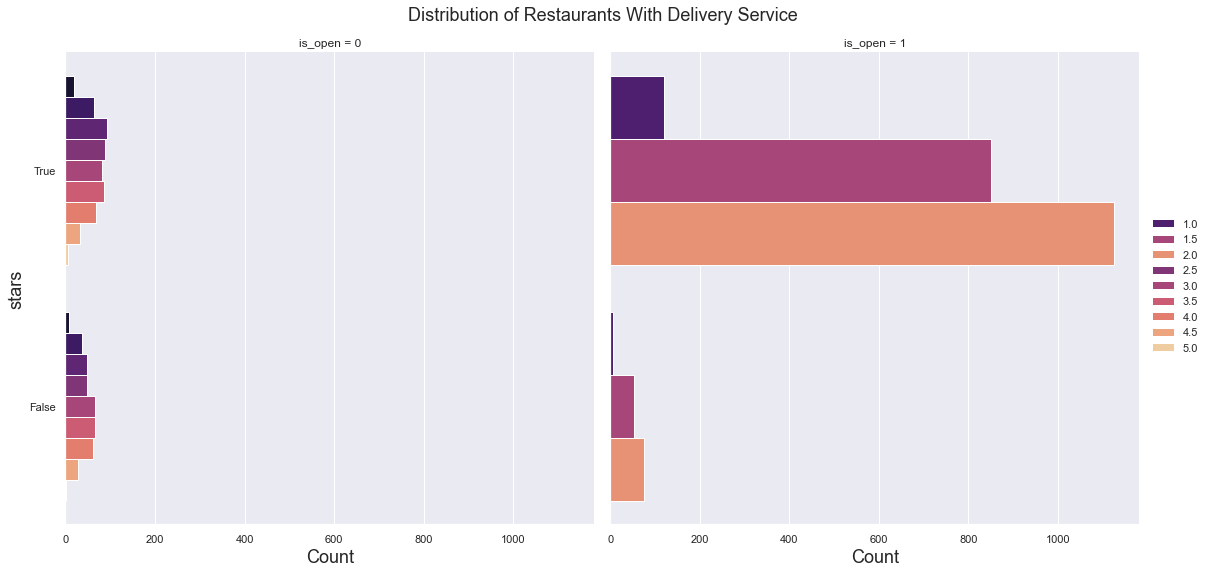

In [50]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
def countplot(x, hue, **kwargs):
    sns.countplot(y=x, hue=hue, **kwargs)
g = sns.FacetGrid(df_attributes,col="is_open")
g.figure.set_size_inches(16, 8)
g.map(countplot,'RestaurantsDelivery','stars',palette='magma').add_legend().set_axis_labels("Count","stars",size=18)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Restaurants With Delivery Service',size = 18)
plt.show()

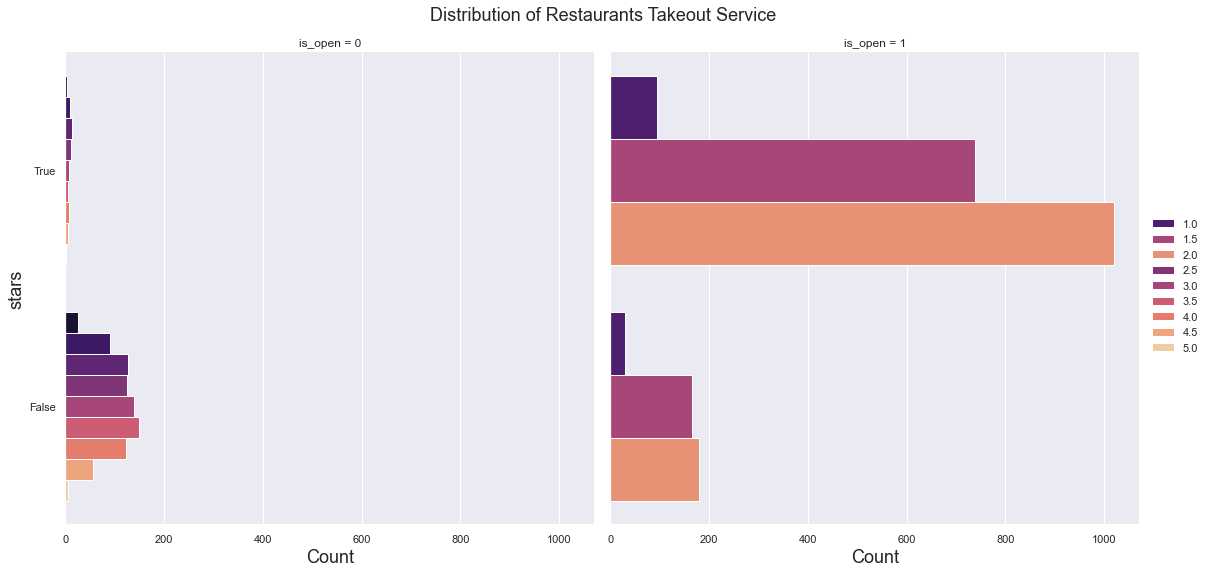

In [39]:
g = sns.FacetGrid(df_attributes,col="is_open")
g.figure.set_size_inches(16, 8)
g.map(countplot,'RestaurantsTakeOut','stars',palette='magma').add_legend().set_axis_labels("Count","stars",size=18)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Restaurants With Takeout Service',size = 18)
plt.show()

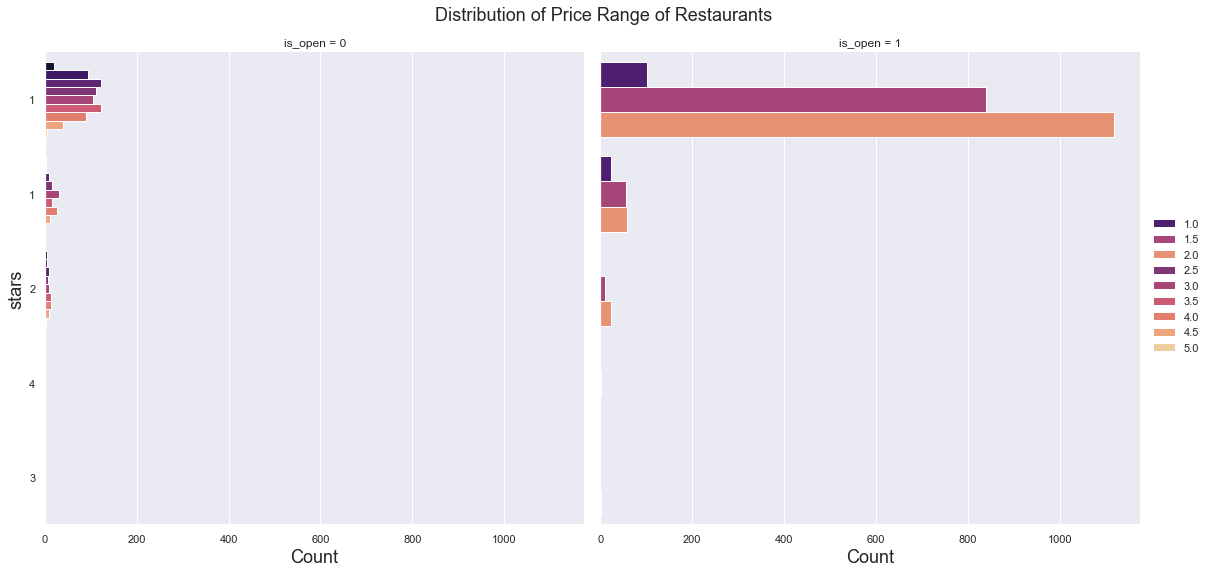

In [48]:
g = sns.FacetGrid(df_attributes,col="is_open")
g.figure.set_size_inches(16, 8)
g.map(countplot,'RestaurantsPriceRange2','stars',palette='magma').add_legend().set_axis_labels("Count","stars",size=18)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Price Range of Restaurants',size = 18)
plt.show()

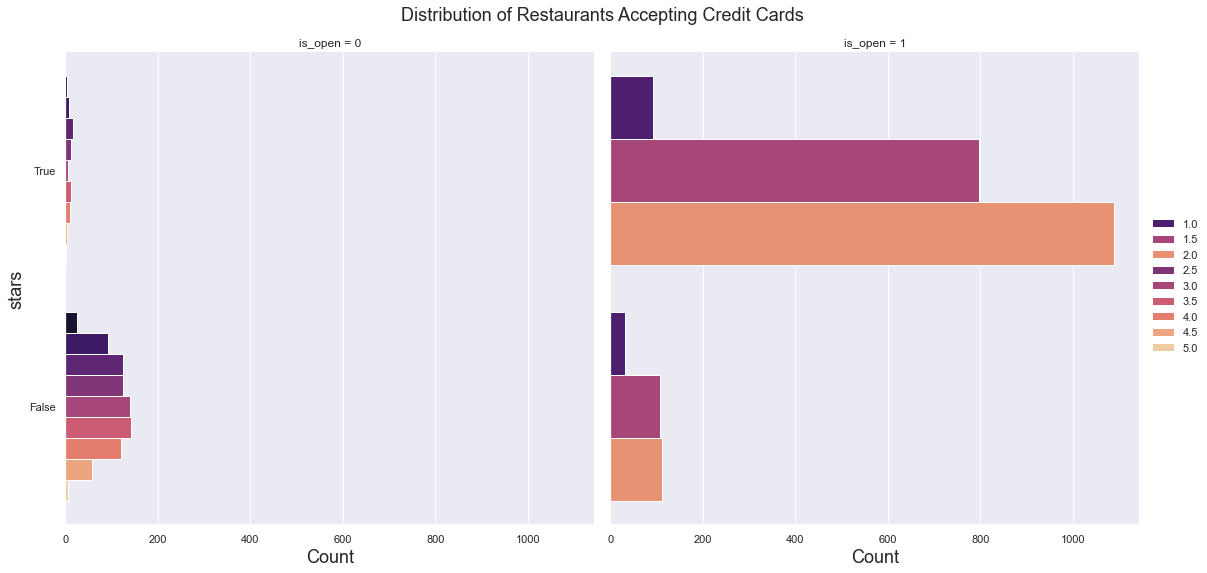

In [47]:
g = sns.FacetGrid(df_attributes,col="is_open")
g.figure.set_size_inches(16, 8)
g.map(countplot,'BusinessAcceptsCreditCards','stars',palette='magma').add_legend().set_axis_labels("Count","stars",size=18)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Restaurants Accepting Credit Cards',size = 18)
plt.show()

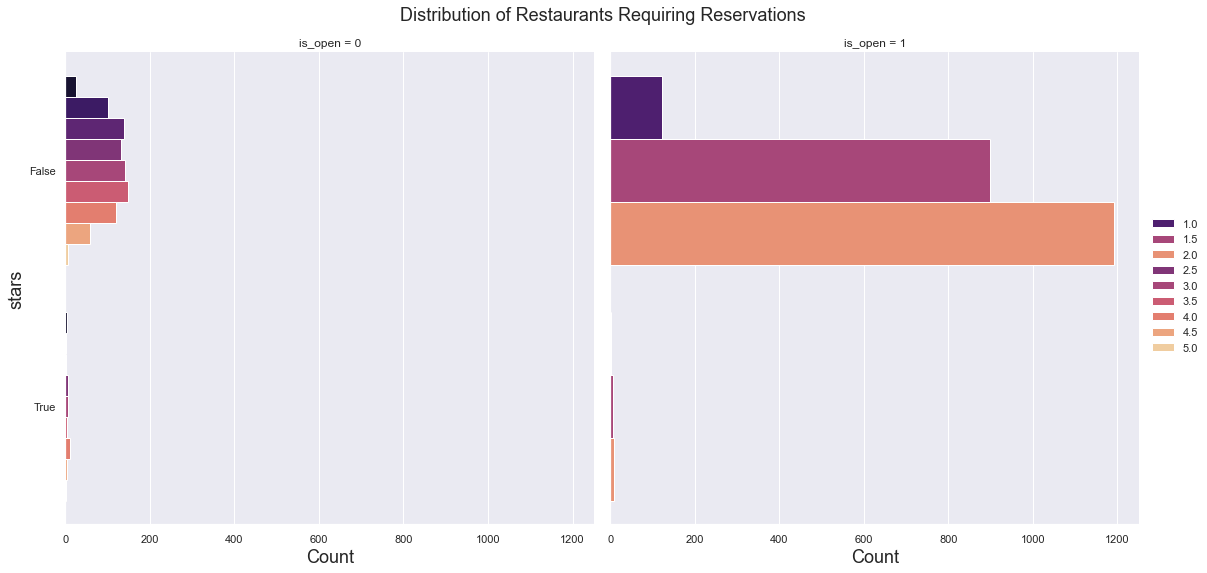

In [44]:
g = sns.FacetGrid(df_attributes,col="is_open")
g.figure.set_size_inches(16, 8)
g.map(countplot,'RestaurantsReservations','stars',palette='magma').add_legend().set_axis_labels("Count","stars",size=18)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Restaurants Requiring Reservations',size = 18)
plt.show()

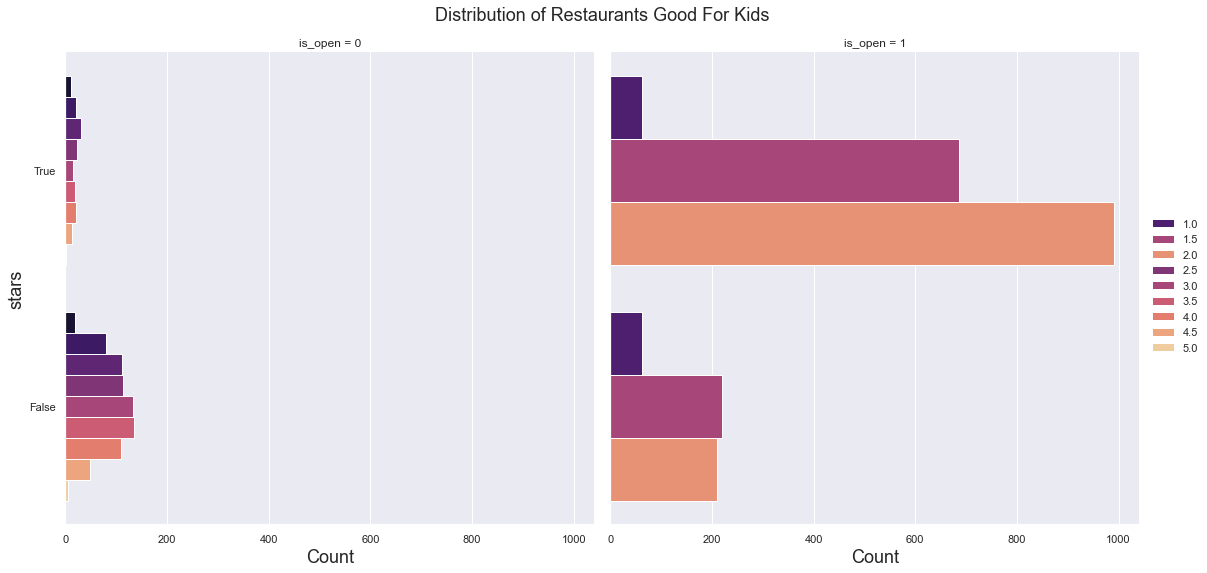

In [45]:
g = sns.FacetGrid(df_attributes,col="is_open")
g.figure.set_size_inches(16, 8)
g.map(countplot,'GoodForKids','stars',palette='magma').add_legend().set_axis_labels("Count","stars",size=18)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Restaurants Good For Kids',size = 18)
plt.show()

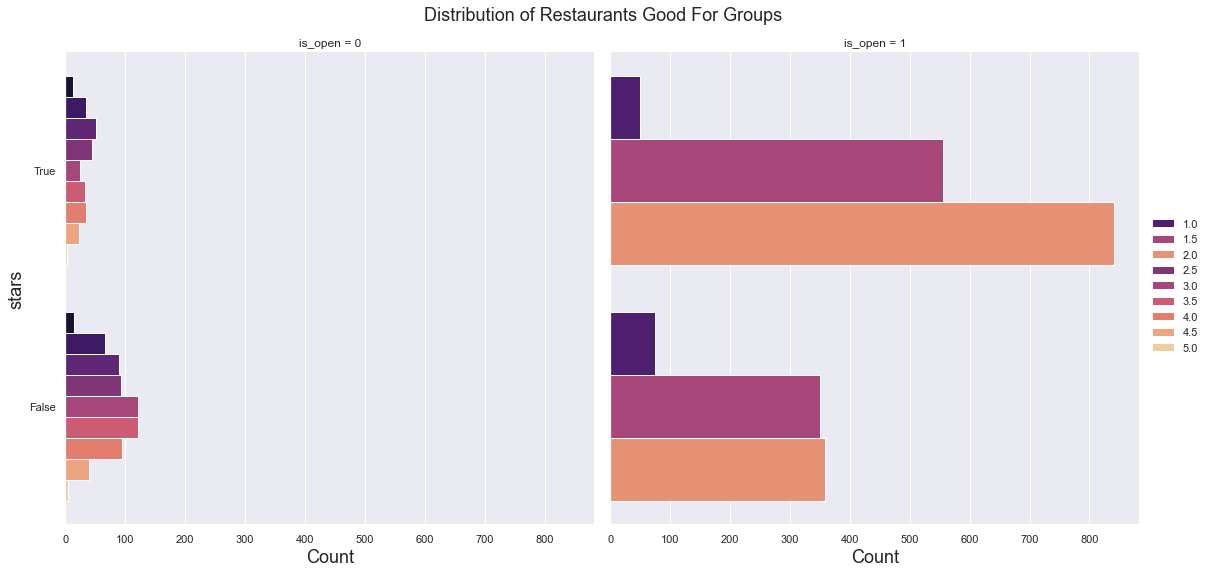

In [46]:
g = sns.FacetGrid(df_attributes,col="is_open")
g.figure.set_size_inches(16, 8)
g.map(countplot,'RestaurantsGoodForGroups','stars',palette='magma').add_legend().set_axis_labels("Count","stars",size=18)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Restaurants Good For Groups',size = 18)
plt.show()